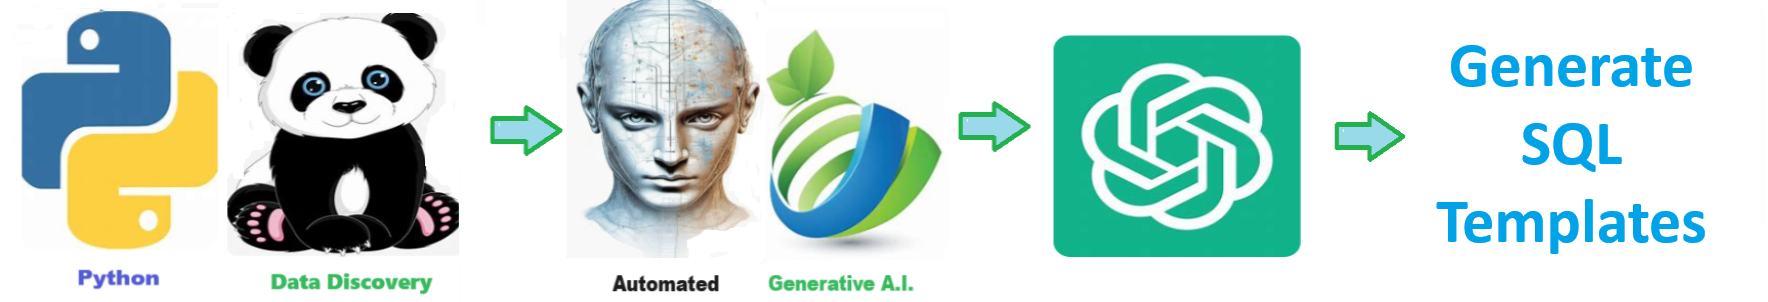

# Generate SQL

#### Generates SQL for table creation, sample queries and ETL Processing 

The quote from Good Will Hunting (1997) is:

***"My boy's wicked smart."*** – Morgan O'Mally (played by Casey Affleck)

In [1]:
first_intallation = False 
if first_intallation: 
    !pip install --upgrade bottleneck
    !pip install pipreqs
# pipreqs /path/to/your/project --force    

In [2]:
import os
import schedule
from datetime import datetime
import pandas as pd
import numpy as np
import numbers
import file_manager as fm 
import quick_logger as ql 
import talking_code as tc 
from docx import Document
from docx.shared import Inches
from IPython.display import Video
import domain_topic_classifier as dtc
import ethical_guideline as eg 
import time
import story_board as sb 
import postgres_utils as pg
from IPython.display import Markdown, display, Image
print(f"Libraries Imported succesfully on {datetime.now().date()} at {datetime.now().time()}") 

Libraries Imported succesfully on 2025-04-30 at 22:43:07.064973


#### Required Setup Step 0 - Intitiate Configuration Settings and name the overall solution

In [3]:
import configparser 
config = configparser.ConfigParser()
cfg = config.read('config.ini')  
solution_name = 'sql_generation'

#### Required Setup Step 0 - Intitiate Logging and debugging 

In [4]:
import logging # built in python library that does not need to be installed 
import file_manager as fm 
import quick_logger as ql 

global start_stime 
start_time = ql.set_start_time()
logging = ql.create_logger_start(solution_name, start_time) 
ql.pvlog('info',f"Process started {solution_name} on Date:{datetime.now().strftime('%m-%d-%Y')} at Time:{datetime.now().strftime('%I:%M:%S %p')} ")

Process started sql_generation on Date:04-30-2025 at Time:10:43:07 PM 


In [5]:
# Create a new Document
report_date_stamp = datetime.now().date()
report_time_stamp = datetime.now().time()
data_story_doc = Document()
data_story_doc.add_heading(f"Data Science Story Board - {solution_name}", level=1)
data_story_doc.add_heading(f"Processed on : {report_date_stamp} at {report_time_stamp}", level=3)

In [6]:
definition = '''
## Generate SQL

🔹 Generate SQL will generate various forms of SQL based upon the datas descriptive statistics:

1. ✅ **Create Table** → Adds a **table_name** for the table or dataset.
2. ✅ **SQL Select** → Adds a **column_name** for current column, how pandas named the raw data.
3. ✅ **ETL Process** → Adds a column for the **pandas.dtype**, how pandas inferred the raw data.


''' 
sb.start_story(definition)


## Generate SQL

🔹 Generate SQL will generate various forms of SQL based upon the datas descriptive statistics:

1. ✅ **Create Table** → Adds a **table_name** for the table or dataset.
2. ✅ **SQL Select** → Adds a **column_name** for current column, how pandas named the raw data.
3. ✅ **ETL Process** → Adds a column for the **pandas.dtype**, how pandas inferred the raw data.




In [7]:
import postgres_utils as pg
DB_NAME, USER, PASSWORD, HOST, PORT = pg.get_connection_credentials()
connection = pg.connect_to_postgresql(DB_NAME, USER, PASSWORD, HOST, PORT) 

✅ Connection to PostgreSQL successful!


In [8]:
getting_data_from_DB = True
if getting_data_from_DB: 
    df_penguin = pg.query_to_dataframe("Select * from penguin" , connection)
    df_titanic = pg.query_to_dataframe("Select * from titanic" , connection)    
    df_heart = pg.query_to_dataframe("Select * from heart" , connection)    
    df_diabetes = pg.query_to_dataframe("Select * from diabetes" , connection)  
    df_hel = pg.query_to_dataframe("Select * from wny_health" , connection)    
    df_chronic_disease = pg.query_to_dataframe("Select * from chronic_disease" , connection)  
    df_health_care = pg.query_to_dataframe("Select * from health_care" , connection)     

print(f'The data contains {df_titanic.shape[0]} rows and {df_titanic.shape[1]} columns of titanic data' )
print(f'The data contains {df_penguin.shape[0]} rows and {df_penguin.shape[1]} columns of penguin data')
print(f'The data contains {df_health_care.shape[0]} rows and {df_health_care.shape[1]} columns of health_care data')
print(f'The data contains {df_diabetes.shape[0]} rows and {df_diabetes.shape[1]} columns of diabetes data')
print(f'The data contains {df_heart.shape[0]} rows and {df_heart.shape[1]} columns of heart data')
print(f'The data contains {df_chronic_disease.shape[0]} rows and {df_chronic_disease.shape[1]} columns of chronic_disease data')
print(f'The data contains {df_hel.shape[0]} rows and {df_hel.shape[1]} columns of WNY Healthelink - wny_health data')

C:\Users\josep\generate_SQL\postgres_utils.py:222: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


✅ Query executed successfully. Data retrieved.
✅ Query executed successfully. Data retrieved.
✅ Query executed successfully. Data retrieved.
✅ Query executed successfully. Data retrieved.
✅ Query executed successfully. Data retrieved.
✅ Query executed successfully. Data retrieved.
✅ Query executed successfully. Data retrieved.
The data contains 1309 rows and 21 columns of titanic data
The data contains 344 rows and 18 columns of penguin data
The data contains 55500 rows and 15 columns of health_care data
The data contains 768 rows and 10 columns of diabetes data
The data contains 918 rows and 13 columns of heart data
The data contains 311745 rows and 34 columns of chronic_disease data
The data contains 1000 rows and 26 columns of WNY Healthelink - wny_health data


In [9]:
# df_chronic_disease = df_chronic_disease[['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
#        'Topic', 'Question', 'Response', 'DataValueUnit', 'DataValueType',
#        'DataValue', 'DataValueAlt','DataValueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit']] 
# df_chronic_disease.shape

In [10]:
df_schema_data = pg.query_to_dataframe("Select * from schema_statistics" , connection)   

print(f"read schema data and found statistics on {df_schema_data.table_name.nunique()} tables")
print(f'The data contains {df_schema_data.shape[0]} rows and {df_schema_data.shape[1]} columns of schema data' )
print(f"The schema contains {df_schema_data['table_name'].nunique()} tables")
print(f"The schema contains {df_schema_data['column_name'].count()} column names")   
tables = df_schema_data['table_name'].unique()
print(tables)
df_schema_data.head(2)

✅ Query executed successfully. Data retrieved.
read schema data and found statistics on 7 tables
The data contains 158 rows and 36 columns of schema data
The schema contains 7 tables
The schema contains 158 column names
['titanic' 'diabetes' 'health_care' 'wny_health' 'heart' 'penguin'
 'chronic_disease']


,table_name,column_name,column_number,sql_data_type,likely_primary_key,likely_foreign_key,likely_categorical,count,mean,std_dev,...,q2_median,q3_upper_quartile,q4_top_quartile_spread,p10_percentile,p90_percentile,s_iqr,s_range,s_min_value,s_max_value,inferred_column_description
0,titanic,age,1,BIGINT,0,0,0,1046,29.881137667304014,14.413493211271334,...,28,39,41,14,50,18,79.83,0.17,80,Table titanic Column age of type BIGINT and ma...
1,titanic,age_wiki,2,FLOAT,0,0,0,1302,29.41582949308756,13.758954165153384,...,28,37.75,36.25,15,48,16.75,73.83,0.17,74,Table titanic Column age_wiki of type FLOAT an...


In [11]:
df_schema_data.columns

Index(['table_name', 'column_name', 'column_number', 'sql_data_type',
       'likely_primary_key', 'likely_foreign_key', 'likely_categorical',
       'count', 'mean', 'std_dev', 'min_value', 'percentile_25',
       'percentile_50', 'percentile_75', 'max_value', 's_count',
       's_missing_values', 's_unique_values', 's_most_frequent', 's_mean',
       's_std_dev', 's_variance', 's_coeff_variation', 's_skewness',
       's_kurtosis', 'q1_lower_quartile', 'q2_median', 'q3_upper_quartile',
       'q4_top_quartile_spread', 'p10_percentile', 'p90_percentile', 's_iqr',
       's_range', 's_min_value', 's_max_value', 'inferred_column_description'],
      dtype='object')

In [12]:
def get_select_identifiers(table_name):
    if table_name == 'titanic' : 
        nlp_column = 'passengers'
        sql_select_ID = 'passengerid' 
    if table_name == 'penguin' : 
        nlp_column = 'penguins'
        sql_select_ID = 'sample_number' 
    if table_name == 'health_care' : 
        nlp_column = 'people'
        sql_select_ID = 'name' 
    if table_name == 'diabetes' : 
        nlp_column = 'diabetic patients'
        sql_select_ID = 'patient_id'  
    if table_name == 'heart' : 
        nlp_column = 'patients'
        sql_select_ID = 'patient_id'    
    if table_name == 'wny_health' : 
        nlp_column = 'WNY Patients'
        sql_select_ID = 'research_id'   
    if table_name == 'chronic_disease' : 
        nlp_column = 'prevalence'
        sql_select_ID = 'locationdesc'         
    return nlp_column, sql_select_ID

In [13]:
df_chronic_disease.head(2)

,yearstart,yearend,locationabbr,locationdesc,datasource,topic,question,response,datavalueunit,datavaluetype,...,topicid,questionid,responseid,datavaluetypeid,stratificationcategoryid1,stratificationid1,stratificationcategoryid2,stratificationid2,stratificationcategoryid3,stratificationid3
0,2022,2022,MT,Montana,BRFSS,Arthritis,Arthritis among adults,None,%,Age-adjusted Prevalence,...,ART,ART01,None,AGEADJPREV,RACE,WHT,None,None,None,None
1,2022,2022,MD,Maryland,BRFSS,Social Determinants of Health,Lack of reliable transportation in the past 12...,None,%,Crude Prevalence,...,SDOH,SDH06,None,CRDPREV,RACE,BLK,None,None,None,None


In [14]:
def generate_sql_select_all(df_schema, table_name):
    return f"SELECT * FROM {table_name} LIMIT 10;"

def generate_nlp_select_all(df_schema, table_name):
    return f"Show all records from {table_name}."

def generate_sql_select_all_detail(df_schema, table_name):
    table_columns = df_schema[df_schema["table_name"] == table_name]["column_name"]
    column_list = ",  ".join([f"{col}" for col in table_columns])  # Format column names safely    
    return f"SELECT {column_list} FROM {table_name};"

def generate_nlp_select_all_detail(schema, table_name):
    return f"Show detail for all records from {table_name}."

In [15]:
# Initialize the DataFrame for storing training questions
df_training_questions = pd.DataFrame(columns=['Table_Name', 'SQL_Type', 'SQL_Query', 'NLP_Query'])

# Get unique list of tables from schema data
list_of_tables = df_schema_data.table_name.unique()

for table_number, table_name in enumerate(list_of_tables):
    print(f"Table#{table_number} - Name:{table_name}")
    select_all_sql = generate_sql_select_all(df_schema_data, table_name)
    select_all_nlp = generate_nlp_select_all(df_schema_data, table_name)

    new_row = pd.DataFrame({
        'Table_Name': [table_name], 
        'SQL_Type': ['select all'], 
        'SQL_Query': [select_all_sql], 
        'NLP_Query': [select_all_nlp]
    })
    df_training_questions = pd.concat([df_training_questions, new_row], ignore_index=True)

Table#0 - Name:titanic
Table#1 - Name:diabetes
Table#2 - Name:health_care
Table#3 - Name:wny_health
Table#4 - Name:heart
Table#5 - Name:penguin
Table#6 - Name:chronic_disease


In [16]:
df_training_questions.head(10)

,Table_Name,SQL_Type,SQL_Query,NLP_Query
0,titanic,select all,SELECT * FROM titanic LIMIT 10;,Show all records from titanic.
1,diabetes,select all,SELECT * FROM diabetes LIMIT 10;,Show all records from diabetes.
2,health_care,select all,SELECT * FROM health_care LIMIT 10;,Show all records from health_care.
3,wny_health,select all,SELECT * FROM wny_health LIMIT 10;,Show all records from wny_health.
4,heart,select all,SELECT * FROM heart LIMIT 10;,Show all records from heart.
5,penguin,select all,SELECT * FROM penguin LIMIT 10;,Show all records from penguin.
6,chronic_disease,select all,SELECT * FROM chronic_disease LIMIT 10;,Show all records from chronic_disease.


In [17]:
nlp_column, sql_from_column = get_select_identifiers('titanic')
print(nlp_column)

passengers


In [18]:
tables = df_schema_data['table_name'].unique()
print(tables)

['titanic' 'diabetes' 'health_care' 'wny_health' 'heart' 'penguin'
 'chronic_disease']


In [19]:
df_schema_data.columns

Index(['table_name', 'column_name', 'column_number', 'sql_data_type',
       'likely_primary_key', 'likely_foreign_key', 'likely_categorical',
       'count', 'mean', 'std_dev', 'min_value', 'percentile_25',
       'percentile_50', 'percentile_75', 'max_value', 's_count',
       's_missing_values', 's_unique_values', 's_most_frequent', 's_mean',
       's_std_dev', 's_variance', 's_coeff_variation', 's_skewness',
       's_kurtosis', 'q1_lower_quartile', 'q2_median', 'q3_upper_quartile',
       'q4_top_quartile_spread', 'p10_percentile', 'p90_percentile', 's_iqr',
       's_range', 's_min_value', 's_max_value', 'inferred_column_description'],
      dtype='object')

In [20]:
# Generate SQL query for each column in each table based on the most frequent value
for index, row in df_schema_data.iterrows():
    table_name = row['table_name']
    column_name = row['column_name']
    most_frequent_value = row['s_most_frequent']
    average_value = row['mean']    
    max_value = row['max_value']   
    min_value = row['min_value']            
    
    nlp_column, sql_from_column = get_select_identifiers(table_name)

    col_value = most_frequent_value

    if col_value != 'None': 
        if isinstance(col_value, str): 
            col_value = f"'{col_value}'"
        
        sql_query = f"SELECT COUNT(distinct {sql_from_column}) FROM {table_name} WHERE {column_name} = {col_value};"
        nlp_query = f"how many {nlp_column} in {table_name} with a {column_name} is {col_value};"
        
        new_row = pd.DataFrame({
            'Table_Name': [table_name], 
            'SQL_Type': ['select count of filter'], 
            'SQL_Query': [sql_query], 
            'NLP_Query': [nlp_query]
        })
        df_training_questions = pd.concat([df_training_questions, new_row], ignore_index=True)

    col_value = average_value
    if isinstance(col_value, str): 
        col_value = f"'{col_value}'"
    
    # Generate SQL query
    sql_query = f"SELECT COUNT(distinct {sql_from_column}) FROM {table_name} WHERE {column_name} = {col_value};"
    nlp_query = f"how many {nlp_column} in {table_name} with a {column_name} is {col_value};"
    
    new_row = pd.DataFrame({
        'Table_Name': [table_name], 
        'SQL_Type': ['select count of filter'], 
        'SQL_Query': [sql_query], 
        'NLP_Query': [nlp_query]
    })
    df_training_questions = pd.concat([df_training_questions, new_row], ignore_index=True)

    col_value = max_value
    if isinstance(col_value, str): 
        col_value = f"'{col_value}'"
    
    # Generate SQL query

    sql_query = f"SELECT COUNT(distinct {sql_from_column}) FROM {table_name} WHERE {column_name} = {col_value};"
    nlp_query = f"how many {nlp_column} in {table_name} with a {column_name} is {col_value};"
        
    new_row = pd.DataFrame({
        'Table_Name': [table_name], 
        'SQL_Type': ['select count of filter'], 
        'SQL_Query': [sql_query], 
        'NLP_Query': [nlp_query]
    })
    df_training_questions = pd.concat([df_training_questions, new_row], ignore_index=True)

    col_value = min_value
    if isinstance(col_value, str): 
        col_value = f"'{col_value}'"
    
    # Generate SQL query
    sql_query = f"SELECT COUNT(distinct {sql_from_column}) FROM {table_name} WHERE {column_name} = {col_value};"
    nlp_query = f"how many {nlp_column} in {table_name} with a {column_name} is {col_value};"
    
    new_row = pd.DataFrame({
        'Table_Name': [table_name], 
        'SQL_Type': ['select count of filter'], 
        'SQL_Query': [sql_query], 
        'NLP_Query': [nlp_query]
    })
    df_training_questions = pd.concat([df_training_questions, new_row], ignore_index=True)
df_training_questions.shape    

(639, 4)

In [21]:
df_training_questions.shape

(639, 4)

In [22]:
df_schema_data.table_name.unique()

array(['titanic', 'diabetes', 'health_care', 'wny_health', 'heart',
       'penguin', 'chronic_disease'], dtype=object)

In [23]:
df_schema_data.head(100)

,table_name,column_name,column_number,sql_data_type,likely_primary_key,likely_foreign_key,likely_categorical,count,mean,std_dev,...,q2_median,q3_upper_quartile,q4_top_quartile_spread,p10_percentile,p90_percentile,s_iqr,s_range,s_min_value,s_max_value,inferred_column_description
0,titanic,age,1,BIGINT,0,0,0,1046,29.881137667304014,14.413493211271334,...,28,39,41,14,50,18,79.83,0.17,80,Table titanic Column age of type BIGINT and ma...
1,titanic,age_wiki,2,FLOAT,0,0,0,1302,29.41582949308756,13.758954165153384,...,28,37.75,36.25,15,48,16.75,73.83,0.17,74,Table titanic Column age_wiki of type FLOAT an...
2,titanic,boarded,3,BIGINT,0,0,1,1304,None,None,...,None,None,None,None,None,None,None,None,None,Table titanic Column boarded of type BIGINT an...
3,titanic,body,4,VARCHAR(255),0,0,0,130,None,None,...,None,None,None,None,None,None,None,None,None,Table titanic Column body of type VARCHAR(255)...
4,titanic,cabin,5,VARCHAR(255),0,0,0,1309,None,None,...,None,None,None,None,None,None,None,None,None,Table titanic Column cabin of type VARCHAR(255...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,wny_health,hypertension,16,FLOAT,0,0,1,1000,None,None,...,None,None,None,None,None,None,None,None,None,Table wny_health Column hypertension of type F...
96,wny_health,obesity,17,VARCHAR(255),0,0,1,1000,None,None,...,None,None,None,None,None,None,None,None,None,Table wny_health Column obesity of type VARCHA...
97,wny_health,pd_type,18,VARCHAR(255),0,0,1,61,None,None,...,None,None,None,None,None,None,None,None,None,Table wny_health Column pd_type of type VARCHA...
98,wny_health,prediabetes,19,VARCHAR(255),0,0,1,1000,None,None,...,None,None,None,None,None,None,None,None,None,Table wny_health Column prediabetes of type VA...


In [24]:
df_hel.head()

,research_id,age,sex,race_level_1,race_level_2,ethnicity,zip_code,county,adi_state,adi_national,...,hypertension,bp_control,bp_result,obesity,prediabetes,pd_type,tobacco,breast_cancer_screening,cervical_cancer_screening,colorectal_cancer_screening
0,7124523,5,UNKNOWN,WHITE,WHITE,NOT HISPANIC OR LATINO,14304,NIAGARA,UNKNOWN,UNKNOWN,...,N,None,None,N,N,None,N,N,N,N
1,7124523,6,UNKNOWN,WHITE,WHITE,NOT HISPANIC OR LATINO,14304,NIAGARA,UNKNOWN,UNKNOWN,...,N,None,None,N,N,None,N,N,N,N
2,7124523,7,UNKNOWN,WHITE,WHITE,NOT HISPANIC OR LATINO,14304,NIAGARA,UNKNOWN,UNKNOWN,...,N,None,None,N,N,None,N,N,N,N
3,7124523,8,UNKNOWN,WHITE,WHITE,NOT HISPANIC OR LATINO,14304,NIAGARA,UNKNOWN,UNKNOWN,...,N,None,None,N,N,None,N,N,N,N
4,7124523,9,UNKNOWN,WHITE,WHITE,NOT HISPANIC OR LATINO,14304,NIAGARA,UNKNOWN,UNKNOWN,...,N,None,None,N,N,None,Y,N,N,N


In [25]:
df_hel.columns

Index(['research_id', 'age', 'sex', 'race_level_1', 'race_level_2',
       'ethnicity', 'zip_code', 'county', 'adi_state', 'adi_national', 'year',
       'asthma', 'diabetes', 'diabetes_poor_control', 'diabetes_type',
       'hba1c_result', 'hypertension', 'bp_control', 'bp_result', 'obesity',
       'prediabetes', 'pd_type', 'tobacco', 'breast_cancer_screening',
       'cervical_cancer_screening', 'colorectal_cancer_screening'],
      dtype='object')

In [26]:
df_schema_data.head(20)

,table_name,column_name,column_number,sql_data_type,likely_primary_key,likely_foreign_key,likely_categorical,count,mean,std_dev,...,q2_median,q3_upper_quartile,q4_top_quartile_spread,p10_percentile,p90_percentile,s_iqr,s_range,s_min_value,s_max_value,inferred_column_description
0,titanic,age,1,BIGINT,0,0,0,1046,29.881137667304014,14.413493211271334,...,28,39,41,14,50,18,79.83,0.17,80,Table titanic Column age of type BIGINT and ma...
1,titanic,age_wiki,2,FLOAT,0,0,0,1302,29.41582949308756,13.758954165153384,...,28,37.75,36.25,15,48,16.75,73.83,0.17,74,Table titanic Column age_wiki of type FLOAT an...
2,titanic,boarded,3,BIGINT,0,0,1,1304,None,None,...,None,None,None,None,None,None,None,None,None,Table titanic Column boarded of type BIGINT an...
3,titanic,body,4,VARCHAR(255),0,0,0,130,None,None,...,None,None,None,None,None,None,None,None,None,Table titanic Column body of type VARCHAR(255)...
4,titanic,cabin,5,VARCHAR(255),0,0,0,1309,None,None,...,None,None,None,None,None,None,None,None,None,Table titanic Column cabin of type VARCHAR(255...
5,titanic,class,6,FLOAT,0,0,1,1304,2.291411042944785,0.8408524544178396,...,3,3,0,1,3,1.25,2,1,3,Table titanic Column class of type FLOAT and m...
6,titanic,destination,7,BIGINT,0,0,0,1304,None,None,...,None,None,None,None,None,None,None,None,None,Table titanic Column destination of type BIGIN...
7,titanic,embarked,8,BIGINT,0,0,1,1307,None,None,...,None,None,None,None,None,None,None,None,None,Table titanic Column embarked of type BIGINT a...
8,titanic,fare,9,VARCHAR(255),0,0,0,1308,33.29547928134557,51.75866823917414,...,14.4542,31.275,481.05420000000004,7.567500000000001,78.05081999999999,23.379199999999997,512.3292,0,512.3292,Table titanic Column fare of type VARCHAR(255)...
9,titanic,hometown,10,FLOAT,0,0,0,1304,None,None,...,None,None,None,None,None,None,None,None,None,Table titanic Column hometown of type FLOAT an...


In [27]:
df_schema_data.head(10)

,table_name,column_name,column_number,sql_data_type,likely_primary_key,likely_foreign_key,likely_categorical,count,mean,std_dev,...,q2_median,q3_upper_quartile,q4_top_quartile_spread,p10_percentile,p90_percentile,s_iqr,s_range,s_min_value,s_max_value,inferred_column_description
0,titanic,age,1,BIGINT,0,0,0,1046,29.881137667304014,14.413493211271334,...,28,39,41,14,50,18,79.83,0.17,80,Table titanic Column age of type BIGINT and ma...
1,titanic,age_wiki,2,FLOAT,0,0,0,1302,29.41582949308756,13.758954165153384,...,28,37.75,36.25,15,48,16.75,73.83,0.17,74,Table titanic Column age_wiki of type FLOAT an...
2,titanic,boarded,3,BIGINT,0,0,1,1304,None,None,...,None,None,None,None,None,None,None,None,None,Table titanic Column boarded of type BIGINT an...
3,titanic,body,4,VARCHAR(255),0,0,0,130,None,None,...,None,None,None,None,None,None,None,None,None,Table titanic Column body of type VARCHAR(255)...
4,titanic,cabin,5,VARCHAR(255),0,0,0,1309,None,None,...,None,None,None,None,None,None,None,None,None,Table titanic Column cabin of type VARCHAR(255...
5,titanic,class,6,FLOAT,0,0,1,1304,2.291411042944785,0.8408524544178396,...,3,3,0,1,3,1.25,2,1,3,Table titanic Column class of type FLOAT and m...
6,titanic,destination,7,BIGINT,0,0,0,1304,None,None,...,None,None,None,None,None,None,None,None,None,Table titanic Column destination of type BIGIN...
7,titanic,embarked,8,BIGINT,0,0,1,1307,None,None,...,None,None,None,None,None,None,None,None,None,Table titanic Column embarked of type BIGINT a...
8,titanic,fare,9,VARCHAR(255),0,0,0,1308,33.29547928134557,51.75866823917414,...,14.4542,31.275,481.05420000000004,7.567500000000001,78.05081999999999,23.379199999999997,512.3292,0,512.3292,Table titanic Column fare of type VARCHAR(255)...
9,titanic,hometown,10,FLOAT,0,0,0,1304,None,None,...,None,None,None,None,None,None,None,None,None,Table titanic Column hometown of type FLOAT an...


In [28]:
# Generate SQL query for each column in each table based on the most frequent value
for index, row in df_schema_data.iterrows():
    table_name = row['table_name']
    column_name = row['column_name']
    likely_categorical = row['likely_categorical']
    
    nlp_column, sql_from_column = get_select_identifiers(table_name)
    
    if likely_categorical and table_name != 'penguin': 
        if table_name == 'titanic':
            categories = df_titanic[column_name].unique()
        if table_name == 'heart':
            categories = df_heart[column_name].unique()  
        if table_name == 'wny_health':
            categories = df_hel[column_name].unique()  
        if table_name == 'diabetes':
            column_name = column_name.lower()
            categories = df_diabetes[column_name].unique()    
        if table_name == 'penguin':
            categories = df_penguins[column_name].unique()     
        if table_name == 'health_care':
            categories = df_health_care[column_name].unique() 

        category_limit = 20 
        if len(categories) > category_limit:
            categories = categories[:category_limit]                
        
        if len(categories) <= category_limit: 
            for category_value in categories:  
    
                if isinstance(category_value, str):
                    category_value = f"'{category_value}'"
                

                # Generate SQL query
                sql_query = f"SELECT COUNT(distinct {sql_from_column}) FROM {table_name} WHERE {column_name} = {category_value};"
                nlp_query = f"How many {nlp_column} where {column_name} is {category_value};"
    
                new_row = pd.DataFrame({
                    'Table_Name': [table_name], 
                    'SQL_Type': ['select count of category'], 
                    'SQL_Query': [sql_query], 
                    'NLP_Query': [nlp_query]   })
                df_training_questions = pd.concat([df_training_questions, new_row], ignore_index=True)

In [29]:
df_training_questions['query_id'] = range(1, len(df_training_questions) + 1)

In [30]:
df_training_questions['SQL_Type'].value_counts()

SQL_Type
select count of category    1971
select count of filter       632
select all                     7
Name: count, dtype: int64

In [31]:
# categories = df_hel.ADI_State.unique() 
# print(len(categories))
# print(categories) 

In [32]:
# categories = df_hel.PreDiabetes.unique() 
# print(len(categories))
# print(categories) 

In [33]:
# categories = df_hel.PD_Type.unique() 
# print(len(categories))
# print(categories) 

In [34]:
df_hel.columns

Index(['research_id', 'age', 'sex', 'race_level_1', 'race_level_2',
       'ethnicity', 'zip_code', 'county', 'adi_state', 'adi_national', 'year',
       'asthma', 'diabetes', 'diabetes_poor_control', 'diabetes_type',
       'hba1c_result', 'hypertension', 'bp_control', 'bp_result', 'obesity',
       'prediabetes', 'pd_type', 'tobacco', 'breast_cancer_screening',
       'cervical_cancer_screening', 'colorectal_cancer_screening'],
      dtype='object')

In [35]:
df_training_questions.to_parquet("training_questions.parquet") 
df_training_questions.to_csv("training_questions.csv") 
df_training_questions.to_excel("training_questions.xlsx") 

In [36]:
DB_NAME, USER, PASSWORD, HOST, PORT = pg.get_connection_credentials()
connection = pg.connect_to_postgresql(DB_NAME, USER, PASSWORD, HOST, PORT) 

✅ Connection to PostgreSQL successful!


In [37]:
## Drop the old questions 

In [38]:
dropping_tables = True
if dropping_tables:
    pg.drop_table(connection, "training_questions") 

✅ Table 'training_questions' dropped successfully.


In [39]:
pg.create_table_from_dataframe(df_training_questions, "training_questions", DB_NAME, USER, PASSWORD, HOST, PORT) 

✅ Table 'training_questions' created or already exists.
✅ Data inserted into 'training_questions' successfully.


True

In [40]:
df_training_questions.shape

(2610, 5)

In [41]:
df_training_questions.head(20)

,table_name,sql_type,sql_query,nlp_query,query_id
0,titanic,select all,SELECT * FROM titanic LIMIT 10;,Show all records from titanic.,1
1,diabetes,select all,SELECT * FROM diabetes LIMIT 10;,Show all records from diabetes.,2
2,health_care,select all,SELECT * FROM health_care LIMIT 10;,Show all records from health_care.,3
3,wny_health,select all,SELECT * FROM wny_health LIMIT 10;,Show all records from wny_health.,4
4,heart,select all,SELECT * FROM heart LIMIT 10;,Show all records from heart.,5
5,penguin,select all,SELECT * FROM penguin LIMIT 10;,Show all records from penguin.,6
6,chronic_disease,select all,SELECT * FROM chronic_disease LIMIT 10;,Show all records from chronic_disease.,7
7,titanic,select count of filter,SELECT COUNT(distinct passengerid) FROM titani...,how many passengers in titanic with a age is '...,8
8,titanic,select count of filter,SELECT COUNT(distinct passengerid) FROM titani...,how many passengers in titanic with a age is '...,9
9,titanic,select count of filter,SELECT COUNT(distinct passengerid) FROM titani...,how many passengers in titanic with a age is '...,10


In [42]:
def get_domain(row):
    result = dtc.domain_classifier(row)
    if isinstance(result, (list, tuple)) and len(result) == 4:
        return result[0]  # domain_class
    return None  # or "unknown" if you prefer

def get_topic(row):
    result = dtc.topic_classifier(row)
    if isinstance(result, (list, tuple)) and len(result) == 4:
        return result[0]  # domain_class
    return None  # or "unknown" if you prefer

df_training_questions['domain'] = df_training_questions['nlp_query'].apply(get_domain)
df_training_questions['topic'] = df_training_questions['nlp_query'].apply(get_topic)


In [43]:
df_training_questions.head(20)

,table_name,sql_type,sql_query,nlp_query,query_id,domain,topic
0,titanic,select all,SELECT * FROM titanic LIMIT 10;,Show all records from titanic.,1,titanic,titanic
1,diabetes,select all,SELECT * FROM diabetes LIMIT 10;,Show all records from diabetes.,2,healthcare,disease
2,health_care,select all,SELECT * FROM health_care LIMIT 10;,Show all records from health_care.,3,general,general
3,wny_health,select all,SELECT * FROM wny_health LIMIT 10;,Show all records from wny_health.,4,general,general
4,heart,select all,SELECT * FROM heart LIMIT 10;,Show all records from heart.,5,healthcare,anatomy
5,penguin,select all,SELECT * FROM penguin LIMIT 10;,Show all records from penguin.,6,general,general
6,chronic_disease,select all,SELECT * FROM chronic_disease LIMIT 10;,Show all records from chronic_disease.,7,general,general
7,titanic,select count of filter,SELECT COUNT(distinct passengerid) FROM titani...,how many passengers in titanic with a age is '...,8,titanic,titanic
8,titanic,select count of filter,SELECT COUNT(distinct passengerid) FROM titani...,how many passengers in titanic with a age is '...,9,titanic,titanic
9,titanic,select count of filter,SELECT COUNT(distinct passengerid) FROM titani...,how many passengers in titanic with a age is '...,10,titanic,titanic


In [44]:
sql_queries = df_training_questions.sql_query.unique()

In [45]:
df_training_questions.shape

(2610, 7)

In [46]:
for idx, sql in enumerate(sql_queries):
    print(f"{sql}")
    df_query_result = pg.select_query(connection, sql)
    if idx == 10:
        break

SELECT * FROM titanic LIMIT 10;
✅ Select result: 1
SELECT * FROM diabetes LIMIT 10;
✅ Select result: 6
SELECT * FROM health_care LIMIT 10;
✅ Select result: Bobby JacksOn
SELECT * FROM wny_health LIMIT 10;
✅ Select result: 7124523
SELECT * FROM heart LIMIT 10;
✅ Select result: 40
SELECT * FROM penguin LIMIT 10;
✅ Select result: PAL0708
SELECT * FROM chronic_disease LIMIT 10;
✅ Select result: 2022
SELECT COUNT(distinct passengerid) FROM titanic WHERE age = '24.0';
✅ Select result: 47
SELECT COUNT(distinct passengerid) FROM titanic WHERE age = '29.881137667304014';
✅ Select result: 0
SELECT COUNT(distinct passengerid) FROM titanic WHERE age = '80';
✅ Select result: 1
SELECT COUNT(distinct passengerid) FROM titanic WHERE age = '0.17';
✅ Select result: 1


In [47]:
def check_sql(row):
    valid, result = pg.verify_query(connection, row['sql_query'])  # expects tuple
    return pd.Series([valid, result])

df_training_questions[['valid_SQL', 'SQL_Result']] = df_training_questions.apply(check_sql, axis=1)


In [48]:
df_training_questions.head(20)

,table_name,sql_type,sql_query,nlp_query,query_id,domain,topic,valid_SQL,SQL_Result
0,titanic,select all,SELECT * FROM titanic LIMIT 10;,Show all records from titanic.,1,titanic,titanic,True,"(1, 0.0, 3, Braund, Mr. Owen Harris, male, 22...."
1,diabetes,select all,SELECT * FROM diabetes LIMIT 10;,Show all records from diabetes.,2,healthcare,disease,True,"(6, 148, 72, 35, 0, 33.6, 0.627, 50, 1, 0)"
2,health_care,select all,SELECT * FROM health_care LIMIT 10;,Show all records from health_care.,3,general,general,True,"(Bobby JacksOn, 30, Male, B-, Cancer, 2024-01-..."
3,wny_health,select all,SELECT * FROM wny_health LIMIT 10;,Show all records from wny_health.,4,general,general,True,"(7124523, 5, UNKNOWN, WHITE, WHITE, NOT HISPAN..."
4,heart,select all,SELECT * FROM heart LIMIT 10;,Show all records from heart.,5,healthcare,anatomy,True,"(40, M, ATA, 140, 289, 0, Normal, 172, N, 0.0,..."
5,penguin,select all,SELECT * FROM penguin LIMIT 10;,Show all records from penguin.,6,general,general,True,"(PAL0708, 1, Adelie, Adelie Penguin (Pygosceli..."
6,chronic_disease,select all,SELECT * FROM chronic_disease LIMIT 10;,Show all records from chronic_disease.,7,general,general,True,"(2022, 2022, MT, Montana, BRFSS, Arthritis, Ar..."
7,titanic,select count of filter,SELECT COUNT(distinct passengerid) FROM titani...,how many passengers in titanic with a age is '...,8,titanic,titanic,True,47
8,titanic,select count of filter,SELECT COUNT(distinct passengerid) FROM titani...,how many passengers in titanic with a age is '...,9,titanic,titanic,True,0
9,titanic,select count of filter,SELECT COUNT(distinct passengerid) FROM titani...,how many passengers in titanic with a age is '...,10,titanic,titanic,True,1


In [49]:
df_training_questions = df_training_questions[df_training_questions['valid_SQL'] == True]

df_training_questions = df_training_questions[
    ~df_training_questions['SQL_Result'].apply(lambda x: isinstance(x, (tuple, list)))
]

df_training_questions.shape

(1905, 9)

In [50]:
df_training_questions['valid_SQL'].value_counts()

valid_SQL
True    1905
Name: count, dtype: int64

In [51]:
df_training_questions.head()

,table_name,sql_type,sql_query,nlp_query,query_id,domain,topic,valid_SQL,SQL_Result
7,titanic,select count of filter,SELECT COUNT(distinct passengerid) FROM titani...,how many passengers in titanic with a age is '...,8,titanic,titanic,True,47
8,titanic,select count of filter,SELECT COUNT(distinct passengerid) FROM titani...,how many passengers in titanic with a age is '...,9,titanic,titanic,True,0
9,titanic,select count of filter,SELECT COUNT(distinct passengerid) FROM titani...,how many passengers in titanic with a age is '...,10,titanic,titanic,True,1
10,titanic,select count of filter,SELECT COUNT(distinct passengerid) FROM titani...,how many passengers in titanic with a age is '...,11,titanic,titanic,True,1
11,titanic,select count of filter,SELECT COUNT(distinct passengerid) FROM titani...,how many passengers in titanic with a age_wiki...,12,titanic,titanic,True,62


In [52]:
df_training_questions.to_excel('training_questions.xlsx', index=False)

In [53]:
df_training_questions.to_csv('training_questions.csv', index=False)

In [54]:
df_training_questions.to_parquet('training_questions.parquet', index=False)

In [55]:
# echo "# generate_SQL" >> README.md
# git init
# git add README.md
# git commit -m "first commit"
# git branch -M main
# git remote add origin https://github.com/JoeEberle/generate_SQL.git
# git push -u origin main

In [56]:
import os
report_date_stamp = datetime.now().date()
word_file_path = os.path.join(f"{solution_name}_{report_date_stamp}_storyboard.docx")
data_story_doc.save(word_file_path)    
ql.pvlog('info',f"Storyboard Created : {solution_name} ")  

Storyboard Created : sql_generation 


## Step 0 - Process End - display log

In [57]:
# Calculate and classify the process performance 
status = ql.calculate_process_performance(solution_name, start_time) 
print(ql.append_log_file(solution_name))  

2025-04-30 22:43:07,104 - INFO - START sql_generation =============================================
2025-04-30 22:43:07,104 - INFO - START sql_generation Start Time = 2025-04-30 22:43:07
2025-04-30 22:43:07,104 - INFO - sql_generation Step 0 - Initialize the configuration file parser
2025-04-30 22:43:07,104 - INFO - Process started sql_generation on Date:04-30-2025 at Time:10:43:07 PM 
2025-04-30 22:45:26,842 - INFO - Storyboard Created : sql_generation 
2025-04-30 22:45:26,865 - INFO - PERFORMANCE sql_generation The total process duration was:139.76
2025-04-30 22:45:26,865 - INFO - PERFORMANCE sql_generation Stop Time = 2025-04-30 22:45:26
2025-04-30 22:45:26,865 - INFO - PERFORMANCE sql_generation Medium process duration greater than 3 minutes:139.76
2025-04-30 22:45:26,865 - INFO - PERFORMANCE sql_generation Performance optimization is optional
2025-04-30 22:45:26,865 - INFO - END sql_generation =============================================



#### https://github.com/JoeEberle/ -- josepheberle@outlook.com